<a href="https://colab.research.google.com/github/Pilla-Divya-Vidhyasree/NeuroNexus/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the required modules**

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Downloading credit card fraud detection datasets**

In [152]:
train_data = pd.read_csv("/content/fraudTrain.csv")
test_data = pd.read_csv("/content/fraudTest.csv")

**View the data**

In [153]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260934,260934,2019-05-10 05:30:33,4464457352619,"fraud_Tillman, Dickinson and Labadie",gas_transport,35.41,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,29.8826,-84.5964,217.0,Television production assistant,1990-01-24,ddd665186b6183b725354d0449b7d406,1.336628e+09,29.886651,-84.493534,0.0
260935,260935,2019-05-10 05:31:50,36913587729122,fraud_Boyer PLC,misc_pos,4.90,Ana,Mccormick,F,4503 Patricia Route,...,43.6498,-116.4306,84106.0,Intelligence analyst,1971-02-11,934a2d542d0b0fa0be8a56b19e28f308,1.336628e+09,42.790974,-117.010252,0.0
260936,260936,2019-05-10 05:32:27,3533177016567295,fraud_Terry-Huel,shopping_net,7.99,Derek,Bentley,M,782 Lee Crossing Apt. 209,...,40.8731,-96.1528,1517.0,Dealer,1951-11-08,3092246ad22d4dbff057bfa51459a992,1.336628e+09,41.682636,-96.904499,0.0
260937,260937,2019-05-10 05:33:04,3596357274378601,fraud_Heidenreich PLC,grocery_pos,62.68,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688.0,Advice worker,1973-05-27,0d5a790a56aeaa844fc6034b6c899dac,1.336628e+09,41.395298,-77.924178,0.0


In [154]:
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302463,302463,2020-10-13 09:02:41,4079773899158,fraud_Wolf Inc,grocery_pos,137.18,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129.0,Cartographer,1965-12-15,cb26867847d973c3b7bee435938ce26c,1.381655e+09,44.235885,-115.878465,0.0
302464,302464,2020-10-13 09:02:42,30153452207526,fraud_Hermann and Sons,shopping_pos,4.21,Robin,Smith,F,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908.0,Radio producer,1962-04-05,20eb5c26e00fc4fedde9b7c6ff74d1e4,1.381655e+09,31.190872,-98.521849,0.0
302465,302465,2020-10-13 09:04:13,3546897637165774,fraud_Friesen Inc,shopping_pos,2.99,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,1956-05-30,50dabb7734ec893f0a68b808df5bac20,1.381655e+09,32.431544,-96.869864,0.0
302466,302466,2020-10-13 09:04:20,180031190491743,fraud_Bailey-Morar,grocery_pos,173.92,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,...,30.7145,-88.0918,270712.0,"Surveyor, land/geomatics",1972-01-05,93a92f2a975ddd4b1ca54adf1da940e3,1.381655e+09,30.903399,-88.589141,0.0


**Describing the data**

In [155]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,260939.000000,2.609390e+05,260939.000000,260939.000000,260938.000000,260938.000000,2.609380e+05,2.609380e+05,260938.000000,260938.000000,260938.000000
mean,130469.000000,4.162093e+17,70.928118,48792.211758,38.538036,-90.210637,8.978140e+04,1.331379e+09,38.538295,-90.210717,0.007573
std,75326.745283,1.307387e+18,159.414913,26884.700805,5.074759,13.750866,3.043819e+05,3.194611e+06,5.109330,13.763201,0.086691
min,0.000000,6.041621e+10,1.000000,298.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,65234.500000,1.800365e+14,9.660000,26237.000000,34.668900,-96.798000,7.430000e+02,1.328703e+09,34.740417,-96.878857,0.000000
50%,130469.000000,3.519607e+15,47.640000,48174.000000,39.354300,-87.461600,2.456000e+03,1.331596e+09,39.356183,-87.424451,0.000000
75%,195703.500000,4.642255e+15,83.370000,72011.000000,41.894800,-80.158000,2.047800e+04,1.334114e+09,41.956259,-80.219654,0.000000
max,260938.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.336628e+09,67.510267,-66.956540,1.000000


In [156]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260939 entries, 0 to 260938
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             260939 non-null  int64  
 1   trans_date_trans_time  260939 non-null  object 
 2   cc_num                 260939 non-null  int64  
 3   merchant               260939 non-null  object 
 4   category               260939 non-null  object 
 5   amt                    260939 non-null  float64
 6   first                  260939 non-null  object 
 7   last                   260939 non-null  object 
 8   gender                 260939 non-null  object 
 9   street                 260939 non-null  object 
 10  city                   260939 non-null  object 
 11  state                  260939 non-null  object 
 12  zip                    260939 non-null  int64  
 13  lat                    260938 non-null  float64
 14  long                   260938 non-nu

**Preprocessing**

In [157]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob "] = pd.to_datetime(train_data["dob"])
train_data


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dob
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,1988-03-09
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,1978-06-21
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,1962-01-19
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,1967-01-12
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,1986-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260934,260934,2019-05-10 05:30:33,4464457352619,"fraud_Tillman, Dickinson and Labadie",gas_transport,35.41,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,-84.5964,217.0,Television production assistant,1990-01-24,ddd665186b6183b725354d0449b7d406,1.336628e+09,29.886651,-84.493534,0.0,1990-01-24
260935,260935,2019-05-10 05:31:50,36913587729122,fraud_Boyer PLC,misc_pos,4.90,Ana,Mccormick,F,4503 Patricia Route,...,-116.4306,84106.0,Intelligence analyst,1971-02-11,934a2d542d0b0fa0be8a56b19e28f308,1.336628e+09,42.790974,-117.010252,0.0,1971-02-11
260936,260936,2019-05-10 05:32:27,3533177016567295,fraud_Terry-Huel,shopping_net,7.99,Derek,Bentley,M,782 Lee Crossing Apt. 209,...,-96.1528,1517.0,Dealer,1951-11-08,3092246ad22d4dbff057bfa51459a992,1.336628e+09,41.682636,-96.904499,0.0,1951-11-08
260937,260937,2019-05-10 05:33:04,3596357274378601,fraud_Heidenreich PLC,grocery_pos,62.68,David,Everett,M,4138 David Fall,...,-78.2357,3688.0,Advice worker,1973-05-27,0d5a790a56aeaa844fc6034b6c899dac,1.336628e+09,41.395298,-77.924178,0.0,1973-05-27


In [158]:
#drop all the missing value rows
train_data.dropna(inplace = True)
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dob
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,1988-03-09
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,1978-06-21
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,1962-01-19
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,1967-01-12
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,1986-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260933,260933,2019-05-10 05:28:38,3525668150756629,fraud_Haley Group,misc_pos,33.44,Christopher,Choi,M,04611 Sandra Spring Suite 059,...,-87.0436,137.0,Film/video editor,1990-08-13,bfab4fa996584bae032a5d984ba1928a,1.336628e+09,45.661792,-87.089383,0.0,1990-08-13
260934,260934,2019-05-10 05:30:33,4464457352619,"fraud_Tillman, Dickinson and Labadie",gas_transport,35.41,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,-84.5964,217.0,Television production assistant,1990-01-24,ddd665186b6183b725354d0449b7d406,1.336628e+09,29.886651,-84.493534,0.0,1990-01-24
260935,260935,2019-05-10 05:31:50,36913587729122,fraud_Boyer PLC,misc_pos,4.90,Ana,Mccormick,F,4503 Patricia Route,...,-116.4306,84106.0,Intelligence analyst,1971-02-11,934a2d542d0b0fa0be8a56b19e28f308,1.336628e+09,42.790974,-117.010252,0.0,1971-02-11
260936,260936,2019-05-10 05:32:27,3533177016567295,fraud_Terry-Huel,shopping_net,7.99,Derek,Bentley,M,782 Lee Crossing Apt. 209,...,-96.1528,1517.0,Dealer,1951-11-08,3092246ad22d4dbff057bfa51459a992,1.336628e+09,41.682636,-96.904499,0.0,1951-11-08


In [159]:
import matplotlib.pyplot as plt

**Viewing pie chart**

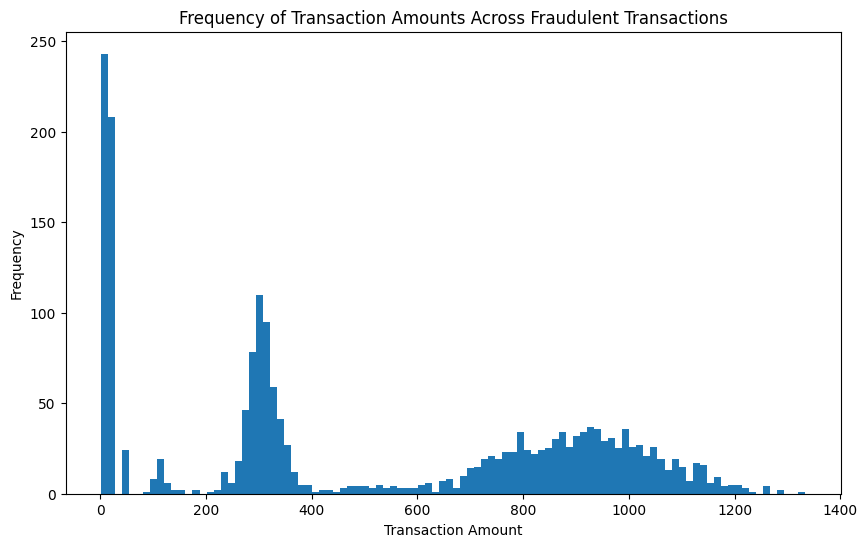

In [160]:
fraud_dataSet = train_data[train_data.is_fraud == 1]
data = fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

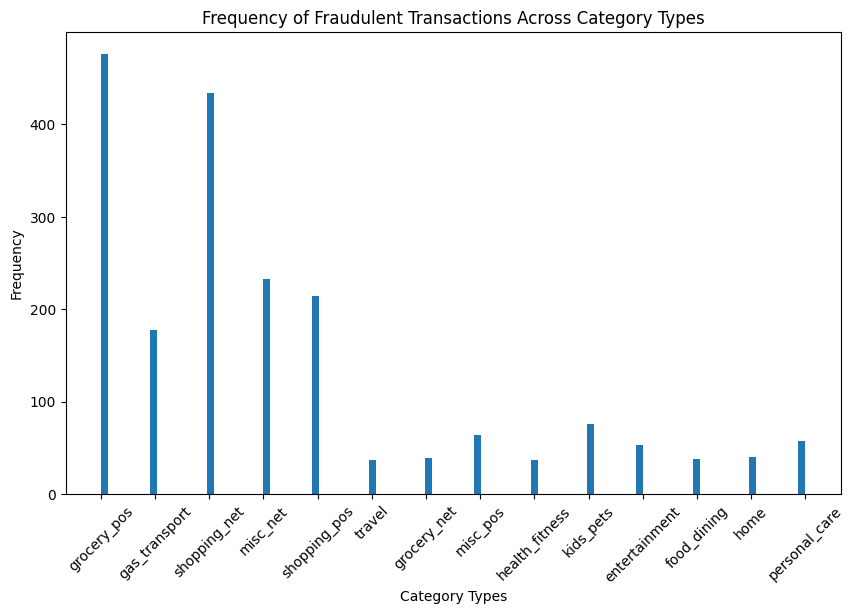

In [161]:
fraud_dataSet = train_data[train_data['is_fraud'] == 1]

data = fraud_dataSet['category']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

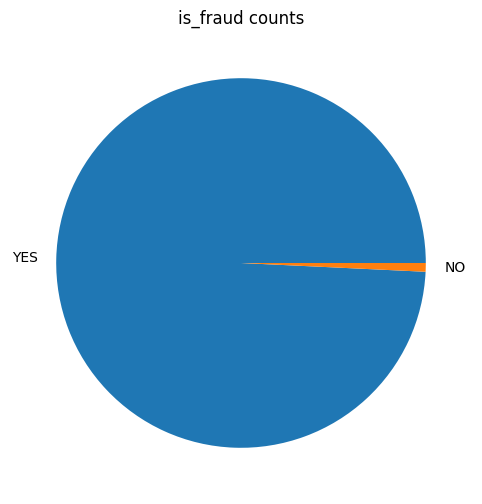

In [162]:
counts = train_data['is_fraud'].value_counts()
plt.figure(figsize =  (12,6))
plt.pie(counts, labels = ['YES', 'NO'])
plt.title("is_fraud counts")
plt.show()

**Removing unwanted columns**

In [163]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,dob
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0,1988-03-09
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0,1978-06-21
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0,1962-01-19
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0,1967-01-12
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0,1986-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260933,fraud_Haley Group,misc_pos,33.44,M,46.3481,-87.0436,137.0,Film/video editor,1.336628e+09,45.661792,-87.089383,0.0,1990-08-13
260934,"fraud_Tillman, Dickinson and Labadie",gas_transport,35.41,F,29.8826,-84.5964,217.0,Television production assistant,1.336628e+09,29.886651,-84.493534,0.0,1990-01-24
260935,fraud_Boyer PLC,misc_pos,4.90,F,43.6498,-116.4306,84106.0,Intelligence analyst,1.336628e+09,42.790974,-117.010252,0.0,1971-02-11
260936,fraud_Terry-Huel,shopping_net,7.99,M,40.8731,-96.1528,1517.0,Dealer,1.336628e+09,41.682636,-96.904499,0.0,1951-11-08


**Encoding data**

In [164]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

**Training the model**

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

ran_clf = RandomForestClassifier()
param_grid = [{'n_estimators':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(ran_clf, param_grid, cv=3, scoring = "accuracy")

In [166]:
col = train_data.columns
col

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'dob '],
      dtype='object')

In [167]:
x_columns = ['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
x_train = train_data[x_columns]
y_train = train_data['is_fraud']

In [168]:
y_train = y_train.astype('int64')
x_train.dtypes


merchant        int64
category        int64
amt           float64
gender          int64
lat           float64
long          float64
city_pop      float64
job             int64
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud      float64
dtype: object

In [169]:
y_train.dtypes

dtype('int64')

In [170]:
rand_clf = RandomForestClassifier(n_estimators = 30)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

**Testing data preprocessing**

In [171]:
test_data.dropna(inplace=True)

In [172]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497.0,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302.0,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496.0,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302462,302462,2020-10-13 09:02:40,30546453310167,277,12,1.86,Nicholas,Tran,1,672 Randall Burg Suite 551,...,43.4512,-71.4890,7430.0,401,1955-01-13,a6fd4205d1d6339dbb32b4f4616e90f1,1.381655e+09,43.170200,-71.026836,0.0
302463,302463,2020-10-13 09:02:41,4079773899158,678,4,137.18,Eric,Preston,1,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129.0,58,1965-12-15,cb26867847d973c3b7bee435938ce26c,1.381655e+09,44.235885,-115.878465,0.0
302464,302464,2020-10-13 09:02:42,30153452207526,246,12,4.21,Robin,Smith,0,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908.0,373,1962-04-05,20eb5c26e00fc4fedde9b7c6ff74d1e4,1.381655e+09,31.190872,-98.521849,0.0
302465,302465,2020-10-13 09:04:13,3546897637165774,179,12,2.99,Kayla,Obrien,0,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,41,1956-05-30,50dabb7734ec893f0a68b808df5bac20,1.381655e+09,32.431544,-96.869864,0.0


In [173]:

x_test = test_data[x_columns]
y_test = test_data['is_fraud']
y_test.astype('int64')

0         0
1         0
2         0
3         0
4         0
         ..
302462    0
302463    0
302464    0
302465    0
302466    0
Name: is_fraud, Length: 302467, dtype: int64

In [174]:
y_pred = rand_clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0